In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%precision 4

'%.4f'

In [4]:
d = pd.read_excel('Salarios-Educacion.xls')

In [5]:
d.head()

,SAL,EDUC,EXPER,HRSWK,MARRIED,FEMALE,METRO,MID,SOUTH,WEST,BLACK,ASIAN
0,18.70,16,39,37,1,1,1,0,1,0,0,0
1,11.50,12,16,62,0,0,0,1,0,0,0,0
2,15.04,16,13,40,1,0,1,0,0,1,1,0
3,25.95,14,11,40,0,1,1,0,1,0,1,0
4,24.03,12,51,40,1,0,1,0,0,0,0,0


# Ejercicio empírico 2.4

El fichero “Salarios‐Educacion.xls” tiene mil observaciones correspondientes a diferentes individuos con información sobre salarios horarios (SAL), educación en años (EDUC), experiencia en años (EXPER), horas trabajadas a la semana (HRSWK), MARRIED (= 1 si casado), FEMALE (= 1 si mujer), METRO (= 1 si vive en zona metropolitana), MID(= 1 si vive en el medio oeste), SOUTH (= 1 si vive en el sur), WEST(= 1 si vive en el oeste), BLACK(= 1 si es negro) y ASIAN (= 1 si es asiático) para el año 2008. Se pide:

## 1) Discutir las características de los datos de SAL y EDUC. Estadísticos e histograma.

In [6]:
a1 = d[['SAL', 'EDUC']]
a1.describe()

,SAL,EDUC
count,1000.000000,1000.000000
mean,20.615660,13.799000
std,12.834725,2.711079
min,1.970000,0.000000
25%,11.250000,12.000000
50%,17.300000,13.000000
75%,25.630000,16.000000
max,76.390000,21.000000


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/seaborn/categorical.py:1791: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


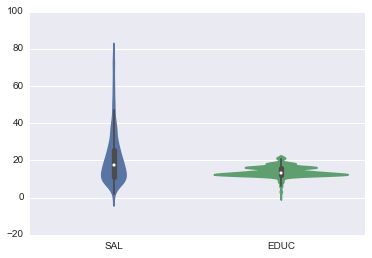

In [7]:
sns.violinplot(a1)

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


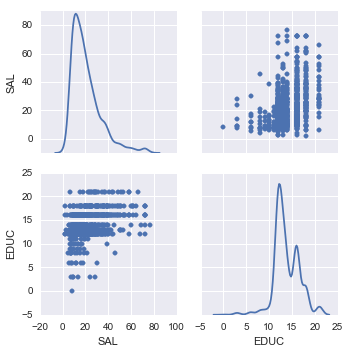

In [8]:
sns.pairplot(a1, diag_kind='kde')

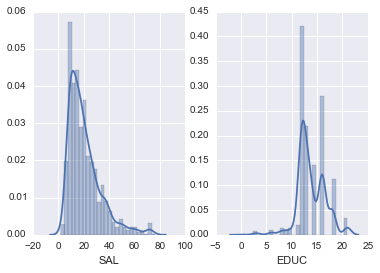

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.distplot(a1.SAL, ax=ax1)
sns.distplot(a1.EDUC, ax=ax2)

## 2) Estimar la regresión lineal $SAL = \beta_1 + \beta_2 EDUC + u$ y comentar los resultados.

In [10]:
f_1 = 'SAL ~ EDUC'
m = ols(f_1, d).fit().get_robustcov_results()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAL   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           3.75e-33
Time:                        15:12:23   Log-Likelihood:                -3874.4
No. Observations:                1000   AIC:                             7753.
Df Residuals:                     998   BIC:                             7763.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.7103      2.124     -3.159      0.0

## 3) Obtener los residuos MCO y hacer un gráfico de estos residuos con la variable EDUC. ¿Se observa alguna pauta relevante?. Si EDUC no es estocástica y se cumplen las hipótesis vistas en teoría, ¿cabría esperar alguna pauta de comportamiento conjunto?

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


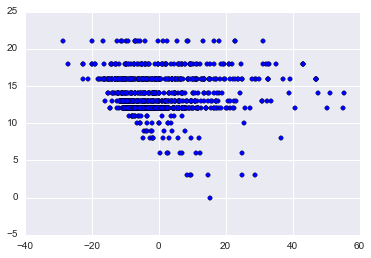

In [11]:
plt.scatter(m.resid, d.EDUC)

## 4) Estimar regresiones separadas para hombres, mujeres, asiáticos y blancos. Comparar los resultados.

In [12]:
d_hombre = d[d['FEMALE'] == 0]
d_mujer = d[d['FEMALE'] == 1]
d_asian = d[d['ASIAN'] == 1]
d_white = d[d['BLACK'] == 1]

In [13]:
f_4 = 'SAL ~ EDUC'
m_hombre = ols(f_4, d_hombre).fit().get_robustcov_results()
m_mujer = ols(f_4, d_mujer).fit().get_robustcov_results()
m_asian = ols(f_4, d_asian).fit().get_robustcov_results()
m_white = ols(f_4, d_white).fit().get_robustcov_results()

In [14]:
print(m_hombre.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAL   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     79.07
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           1.19e-17
Time:                        15:12:24   Log-Likelihood:                -1877.5
No. Observations:                 486   AIC:                             3759.
Df Residuals:                     484   BIC:                             3767.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.0545      2.731     -1.118      0.2

In [15]:
print(m_mujer.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAL   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           5.66e-23
Time:                        15:12:24   Log-Likelihood:                -1977.1
No. Observations:                 514   AIC:                             3958.
Df Residuals:                     512   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -14.1680      3.076     -4.606      0.0

In [16]:
print(m_asian.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAL   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.698
Date:                Wed, 11 Nov 2015   Prob (F-statistic):              0.108
Time:                        15:12:24   Log-Likelihood:                -169.13
No. Observations:                  43   AIC:                             342.3
Df Residuals:                      41   BIC:                             345.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.5464     10.033      0.752      0.4

In [17]:
print(m_white.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAL   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     13.59
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           0.000354
Time:                        15:12:24   Log-Likelihood:                -426.66
No. Observations:                 112   AIC:                             857.3
Df Residuals:                     110   BIC:                             862.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -15.0859      8.594     -1.755      0.0

## 5) Estimar la regresión cuadrática $SAL  = \beta_0 + \beta_1 EDUC ^2 + u$ y comentar losresultados. 
Estimar el efecto marginal de un año adicional de educación sobre los salarios para una persona con 12 años de educación y para otra con 16 años de educación. Comparar estos resultados con los obtenidos en 2).

In [18]:
f5 = 'SAL ~ np.power(EDUC,2)'
m_5 = ols(f5, d).fit().get_robustcov_results()
print(m_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAL   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     178.2
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           1.61e-37
Time:                        15:12:24   Log-Likelihood:                -3866.4
No. Observations:                1000   AIC:                             7737.
Df Residuals:                     998   BIC:                             7747.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             6.0828      1.02

In [19]:
m.params[-1], m_5.params[-1] * 2 * 16

(1.9803, 2.3516)

## 6) Construir un histograma de ln(SAL). Comparar la forma de este histograma con la correspondiente a SAL. ¿Cuál de ellas parece más simétrica y ajustada a una campana de Gauss?

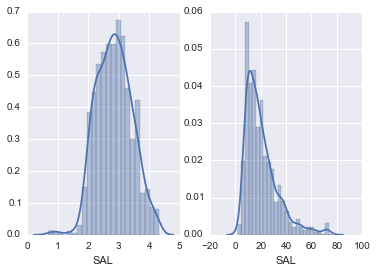

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.distplot(np.log(d.SAL), ax=ax1)
sns.distplot(d.SAL, ax=ax2)

## 7) Estimar la regresión $ln(SAL)= \beta_1 + \beta_2 ln(EDUC)+ u$ . Estimar el efecto marginal de un año adicional de educación sobre los salarios para una persona con 12 años de educación y para otra con 16 años de educación. Comparar estos resultados con los obtenidos en 2) y 5).

In [21]:
f7 = 'np.log(SAL) ~ EDUC'
m7 = ols(f7, d).fit().get_robustcov_results()
print(m7.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(SAL)   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           2.61e-37
Time:                        15:12:24   Log-Likelihood:                -776.65
No. Observations:                1000   AIC:                             1557.
Df Residuals:                     998   BIC:                             1567.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6094      0.095     16.988      0.0

Por cada año mas de educación el salario se incremente en un 0.09 · 100 = 9%
El incremento marginal:

$SAL = e^{\beta_1 + \beta_2 EDUC_i}$

$\frac{\partial{SAL}}{\partial{EDUC}} = \beta_2·e^{\beta_1 + \beta_2 EDUC_i}$


In [22]:
b = m7.params
(b[0] + b[1])

1.6999

## 8) Contrastar la significatividad estadística del coeficiente de EDUC en 2) utilizando un nivel de significación del 5%. Con el mismo nivel de significación obtener una estimación por intervalo de ese coeficiente.

In [23]:
print(m.summary().tables[1])

                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -6.7103      2.124     -3.159      0.002       -10.879    -2.542
EDUC           1.9803      0.159     12.445      0.000         1.668     2.293


## 9) Contrastar la hipótesis nula de que 1  0 frente a la alternativa de que es menor que cero, utilizando un nivel de significación del 1%.

In [24]:
sns.stats.t.ppf(0.01, len(d)- 2)

-2.3301

## 10)Estimar el modelo $ln(SAL)=\beta_1 + \beta_2 EDUC+ \beta_3 EXPER+ \beta_4HRSWK + u$ e interpretar las estimaciones obtenidas para los tres parámetros. ¿Son, desde un punto de vista estadístico, significativamente diferentes de cero?. Los apartados que siguen se refieren a este modelo general si no se dice lo contrario.

In [25]:
f10 = 'np.log(SAL) ~ EDUC + EXPER + HRSWK'
m10 = ols(f10, d).fit().get_robustcov_results()
print(m10.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(SAL)   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     75.88
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           3.29e-44
Time:                        15:12:24   Log-Likelihood:                -750.76
No. Observations:                1000   AIC:                             1510.
Df Residuals:                     996   BIC:                             1529.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1005      0.119      9.271      0.0

## 11) Contrastar la hipótesis nula de que el efecto de un año adicional de educación es, al menos, de un crecimiento del salario del 10% frente a la hipótesis alternativa de que es menos del 10%.

In [26]:
h0 = 'EDUC - 0.1'
m10.t_test(h0)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c0             0.0903      0.007     -1.409      0.159         0.077     0.104

In [27]:
sns.stats.norm.ppf(0.05)

-1.6449

## 12) Definir un intervalo de confianza del 99% para el cambio porcentual de los salarios consecuencia de aumentar una hora el trabajo semanal.

In [28]:
print(m10.summary().tables[1])

                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1005      0.119      9.271      0.000         0.868     1.333
EDUC           0.0903      0.007     13.122      0.000         0.077     0.104
EXPER          0.0058      0.001      4.215      0.000         0.003     0.008
HRSWK          0.0089      0.002      5.320      0.000         0.006     0.012


## 13)Reestimar el modelo en 2) con las variables adicionales $EXPER,EDUC · EXPER,EDUC^2 ,EXPER^2$ . Comentar los resultados.

In [29]:
f13 = 'SAL ~ EXPER + np.multiply(EDUC, EXPER) + np.power(EDUC,2) + np.power(EXPER,2)'
m13 = ols(f13, d).fit().get_robustcov_results()
print(m13.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAL   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     70.36
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           1.69e-52
Time:                        15:12:24   Log-Likelihood:                -3834.5
No. Observations:                1000   AIC:                             7679.
Df Residuals:                     995   BIC:                             7704.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

## 14)Para el nuevo modelo, encontrar expresiones para el efecto marginal $\frac{\partial SAL}{\partial EDUC}$ y $\frac{\partial SAL}{\partial EXPER}$

## 15) Estimar el efecto marginal $\frac{\partial(SAL)}{\partial{EDUC}}$ para dos trabajadores Hill and Wendy; Hill tiene 16 años de educación y 2 años de experiencia, mientras que Wendy tiene 12 años de educación y 2 años de experiencia. ¿Qué puede decirse acerca del efecto marginal de la educación conforme esta crece?

## 16) Contrastar considerando como hipótesis alternativa que el efecto marginal de la educación es mayor en Hill que en Wendy.

$H_0: \beta_5 ≤ 0$

$H_1: \beta_5 > 0$

## 17) Definir un intervalo de confianza del 95% para el efecto marginal en el salario consecuencia de un año adicional de educación para alguien con 16 años de educación y 2 años de experiencia.

## 18) En el modelo en 10), contrastar la hipótesis conjunta de que los coeficientes de las variables EXPER y HRSWK son cero.

In [32]:
h0 = 'EXPER = HRSWK = 0'
m10.f_test(h0)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 24.0166]]), p=6.507629735756835e-11, df_denom=996, df_num=2>

## 19) Considerar el modelo 


$$ln(SAL) = \beta_1 + \beta_2EDUC+ \beta_3BLACK+\beta_4FEMALE+\beta_5(BLACK·FEMALE)+\beta_6SOUTH+\beta_7MID+\beta_8WEST+ u$$

Contrastar si la iteración BLACK y FEMALE es estadísticamente significativa.
Contrastar, también, que no hay efecto regional.

In [42]:
f19 = 'np.log(SAL) ~ EDUC + BLACK + FEMALE + np.multiply(BLACK,FEMALE) + SOUTH + MID + WEST'
m19 = ols(f19, d).fit()

In [43]:
print(m19.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(SAL)   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     44.00
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           2.62e-54
Time:                        15:41:17   Log-Likelihood:                -739.58
No. Observations:                1000   AIC:                             1495.
Df Residuals:                     992   BIC:                             1534.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

In [57]:
h0 = 'SOUTH = MID = WEST = 0'
m19.f_test(h0).summary()

'<F test: F=array([[ 4.2223]]), p=0.005604549663577709, df_denom=992, df_num=3>'

## 20) Estimar el siguiente modelo con MCO y desviaciones típicas robustas a la heterocedasticidad

$$ln(SAL) = \beta_1 + \beta_2EDUC+ \beta_3EXPER+\beta_4EXPER^2+\beta_5(EXPER·EDUC)+u$$

In [62]:
f20 = 'np.log(SAL) ~ EDUC + EXPER + np.power(EXPER,2) + np.multiply(EXPER,EDUC)'
m20 = ols(f20, d).fit()

In [63]:
print(m20.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(SAL)   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     85.07
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           3.57e-62
Time:                        15:53:05   Log-Likelihood:                -734.56
No. Observations:                1000   AIC:                             1479.
Df Residuals:                     995   BIC:                             1504.
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

## 21)Añadir la variable MARRIED al modelo en 20) y reestimarlo. Manteniendo constantes la educación y la experiencia, ¿tienen salarios más altos los trabajadores casados? Utilizando un nivel de significación del 1% contrastar la hipótesis nula de que los salarios de los casados son menores que los de los solteros, frente a la alternativa de que son mayores.

In [64]:
f21 = f20 + '+ MARRIED'
m21 = ols(f21, d).fit()

In [65]:
print(m21.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(SAL)   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     69.11
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           4.41e-62
Time:                        15:53:07   Log-Likelihood:                -733.84
No. Observations:                1000   AIC:                             1480.
Df Residuals:                     994   BIC:                             1509.
Df Model:                           5                                         
Covariance Type:                  HC1                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [67]:
e = 1/100
se = m21.get_robustcov_results().bse[-1]
b = m21.get_robustcov_results().params[-1]
t = b / se

In [68]:
t

1.1877

In [70]:
sns.stats.norm.ppf(1-e)

2.3263

# 22) Hacer un gráfico con los residuos del modelo en 20) contra los dos valores de MARRIED. ¿Hay evidencia de heterocedasticidad?

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


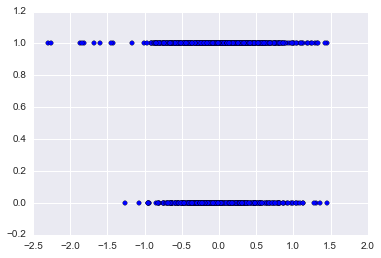

In [75]:
plt.scatter(m21.get_robustcov_results().resid, d.MARRIED)

# 23) Estimar el modelo en 20) dos veces‐la primera, utilizando sólo la información para los casados y la segunda solo la información para los solteros. Contrastar la heterocedasticidad con Goldfeld‐Quandt utilizando el nivel del 5%.

In [83]:
df = d[d.MARRIED == 1]
m23_casados = ols(f20, df).fit()
df = d[d.MARRIED == 0]
m23_solteros = ols(f20, df).fit()

In [84]:
print(m23_casados.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(SAL)   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     38.48
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           1.48e-28
Time:                        16:15:11   Log-Likelihood:                -458.85
No. Observations:                 581   AIC:                             927.7
Df Residuals:                     576   BIC:                             949.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [85]:
print(m23_solteros.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(SAL)   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     39.32
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           6.53e-28
Time:                        16:15:11   Log-Likelihood:                -267.89
No. Observations:                 419   AIC:                             545.8
Df Residuals:                     414   BIC:                             566.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [97]:
df1 = (m23_casados.nobs-len(m23_casados.params))
df2 = (m23_solteros.nobs-len(m23_solteros.params))
a = m23_casados.ssr / df1
b = m23_solteros.ssr / df2

gq = a / b

In [98]:
e = 0.05
f_value = sns.stats.f.ppf(e, df1, df2)
gq, f_value

(1.3464, 0.8616)

# 24) Hacer gráficos de los residuos del modelo en 20) contra EDUC y contra EXPER. ¿Qué sugieren?

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


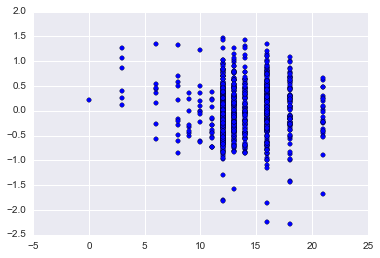

In [103]:
plt.scatter(d.EDUC, m20.resid)

/Users/mmngreco/Virtualenvs/ipynb/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


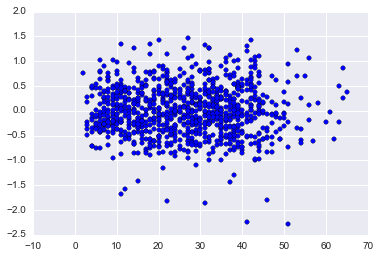

In [104]:
plt.scatter(d.EXPER, m20.resid)

# 25)Utilizando el contraste de Breusch‐Pagan contrastar la heterocedasticidad suponiendo que la varianza depende de EDUC, EXPER y MARRIED. ¿A qué conclusión se llega?

In [131]:
het_exog = np.hstack((m20.model.exog[:,:3], np.array(d.MARRIED).reshape(len(d.MARRIED),1)))

sms.het_breushpagan(m20.resid, het_exog)

(14.6453, 0.0021, 4.9345, 0.0021)